### 모델학습 : 내가 찍은 사진 / 모델테스트 : 팀원 중 1명의 사진

In [93]:
# (1) 필요한 모듈 import하기
from PIL import Image 
import glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


# (2) 데이터 준비 + Resize하기
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

# 가위바위보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images to be resized.
100  images to be resized.


In [94]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 300 입니다.


라벨:  0


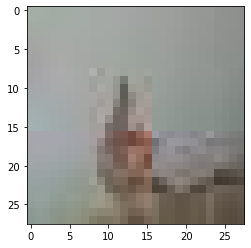

In [95]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [118]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(65, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(40, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 65)        1820      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 65)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 40)        23440     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_31 (Dense)             (None, 3)               

In [119]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=25)

Epoch 1/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0992 - accuracy: 0.3800
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 1.0696 - accuracy: 0.4267
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 1.0062 - accuracy: 0.5800
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.8831 - accuracy: 0.6767
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.7333
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.7433
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7833
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7700
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.8267
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8700
Epoch 11/25
10/10 [

In [120]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)


import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_reshaped = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_reshaped.shape))
print("y_train shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [121]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.8908 - accuracy: 0.6500
test_loss: 0.8907809257507324 
test_accuracy: 0.6499999761581421


### 회고

#### 1. 이번 프로젝트를 진행하면서 어려웠던 점
딥러닝과 관련된 클래스, 메소드 등을 직접 사용하면서 코드를 짜본 것은 이번이 처음이였기에, 설명을 읽고 진행하더라고 각 클래스와 메소드, 함수 등이 어떤 역할을 하고 기능을 하게 되는지에 대한 배경 지식이 없어 이해하기가 힘들었다.

#### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
1) 알아낸 점
  
  A. 모든 모델을 구현하는데 있어서 데이터 전처리는 매우매우 중요하다.
  모델에 데이터를 넣어주기 전 데이터가 제대로 처리되어 있지 않으면 코드가 실행조차 되지 않았고, 실제 데이터를 만들고 코드를 짜보면서   코드 자체를 써내려 가는 시간보다 데이터 전처리 시간이 더 많이 소요된다는 것을 알았다. 
  
  B. 데이터의 질
  데이터의 질 자체가 너무 좋지 않은 경우에는 모델 자체가 굉장히 좋은 모델이라 하더라도 결과가 엉망일 가능성이 높다. 
  
  C. 과대적합(Overfitting)과 과소적합(Underfitting)
  훈련세트와 테스트 세트의 정확도(점수)를 비교했을 때 훈련세트가 너무 높으면 과대적합, 그 반대이거나 두 점수 모두 낮으면 과소적합이라
  고 한다. 발생하는 원인은 여러가지이다. 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우이다.
  즉, 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻이다. 항상 기억해야 할 점은 딥러닝 모델이 훈련 세트에는 학습이 잘 되
  는 경향이 있지만 진짜 해결할 문제는 학습이 아니라 **일반화**라는 것이다.
  
  D. 에포크와 과대적합, 과소적합의 관계성
  모델에 따라서 에포크 회수에 따라 과소적합이나 과대적합이 일어날 수 있다. 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하게 되고, 
  에포크 횟수가 크면 훈련 세트를 완전히 학습해 훈련 세트에만 너무 잘 맞는 모델이 될 가능성이 높아진다.
  
  E.재밌다.
  코드를 직접 짜 보면서 머리가 아프기도 하지만 그만큼 재밌다는 생각을 많이 하게 된다.점점 재미를 붙여가고 있고 이 흥미가 아이펠이 끝
  날 때까지 유지되길 바란다. :-) 
  
  → 알게된 점(과대, 과소적합, 에포크와의 관계성)에 대해서는 추후 벨로그 정리 예정

2) 모호한 점
  
  A. 에포크와 과대적합, 과소적합의 관계성
  모든 모델에서 위에서 본 관계성이 나타나는 것인지?
  
  B. 모델 구현 시 사용된 Layer들(Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense)의 역할과 기능
  
  C. 과대적합을 보완하기 위한 방법으로 '가중치 규제', '드롭아웃 추가'를 텐서플로우 사이트에서 소개하고 있었으나, 이해하기가 어려워 적
  용해보지는 못 했다. 
  
  D. 'images=glob.glob(img_path + "/*.jpg")', 'image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"'
  위 코드에 작성된 부분을 확인하다 보면 앞과 같이 쓰여진 부분이 있는데, 이 부분이 아직까지 완전히 이해된 상황이 아니다. 좀 더 공부가 
  필요할 듯하다.
  
  E. 크로스엔트로피 손실함수(cross-entropy loss function) 사용해보기
  다중 분류에서 사용하는 손실 함수. 손실 함수를 머신러닝 알고리즘이 얼나마 엉터리인지를 측정하는 기준이다. 지금 작성된 알고리즘이 꽤 
  엉터리라 생각되서 한 번 사용해보고 싶었는데, 지금 단계에서는 너무 어렵게 느껴져 시도해보지 못 했다. 다음에 기회가 된다면 사용해보고 
  싶다.
  
  → 모호한 점도 같이 공부해서 벨로그에 업로드 하기

#### 3. 루브릭 평가 지표를 맞추기 위해 시도한 것들
#### 4. 루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정
하단에 루브릭 평가 지표를 맞추기 위해 시도한 것들과 루브릭 평가 지표를 달성하지 못했을 때, 그 이유에 대한 추정을 작성해 보았다.

##### 처음에 정확도가 너무 낮게 다와 다양한 방법을 사용해 정확도를 높여 보았다.

**1)** Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나, Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경 (Conv2D(입력 이미지 특징 수), Densd(뉴런수), epoch(학습 반복 횟수) 값을 늘리기)
(아래 변경 전 결과값은 '[E-01] RockPaperScissor_test' 파일에서 확인 가능)
* 변경 전 : 10, 20, 32, 3, epoch = 10
  * test_loss: 0.9922240972518921 
  * test_accuracy: 0.43666666746139526

* 변경 후 : 65, 40, 100, 3, epoch = 25   
  * test_loss: 0.8907809257507324 
  * test_accuracy: 0.6499999761581421
  * accuracy가 현 시점에서는 60%를 넘기고 있으나 코드를 실행할 때마다 값이 다르게 나오며 60% 아래로 떨어지는 경우도 있었음.
    (모델 자체가 많이 불안정하다 판단된다.)

→ accuracy가 약 65%정도까지 올라가긴 했으나 여전히 loss로 그렇게 좋은 모델이라고 볼 수 없다. 
   test 데이터셋으로 학습 시 accuracy가 약 98%까지 나오는 것을 감안하면 데이터가 과적합(Overfitting) 되었다고 판단된다.
   데이터가 과적합(Overfitting)된 원인에 대해서는 아래와 같이 추정해 볼 수 있을 것이다.
   
   A. epoch값이 너무 크다 → **2)** "다른 하이퍼파라미터 값은 변경된 값으로 그대로 두고 epoch만 10으로 변경" (결과는 하단 부록 참고)
   
   B. 데이터 자체의 문제 
    
    B-1. 학습에 사용한 이미지(내가 만든 이미지)의 경우 가위, 바위, 보 사진을 한 방향이 아닌 여러 방향에서 찍힌 이미지를 사용하였으        나 테스트에 사용한 이미지(팀원 이미지)의 경우 한 방향에서만 찍힌 사진을 사용하였다. 여러 방향에서 찍힌 이미지를 사용해 학습을 하      다보니 다양한 정보를 충분히 학습하지 못 했을 것이라 판단된다. 
     → **3)** "학습 데이터량을 늘려준다." (하이퍼파라미터는 변경 후 값 사용)
     
     B-2. 이미지의 해상도 및 크기 또한 결과값에 영향을 미쳤을 것이라 생각된다. 상단에 출력된 이미지나 
     '[E-01] RockPaperScissor_test'파일에서 출력된 이미지를 보면 사람도 자세히 보아야지만 가위, 바위, 보 구분이 가능할 정도이다. 
     → "크기를 키우고 해상도를 높인다." 머신러닝에서 많이 사용하는 이미지 크기는 32X32 ,64X64 ,96X96 ,245X256으로 여기서는 96X96 
     사용 (하이퍼파라미터는 변경 후 값 사용)
     
     
**2)** 사이킷런의 RandomizedSearchCV클래스를 사용한 하이퍼파라미터 튜닝
RandomizedSearchCV클래스의 경우 하이퍼파라미터 탐색과 교차 검증을 동시에 수행하므로 B-1에서 만들었던 900개의 샘플로 진행한다. 

### 부록

#### A. epoch값이 너무 크다  →  다른 하이퍼파라미터 값은 변경된 값으로 그대로 두고 epoch만 10으로 변경

In [122]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9600
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9867
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9867
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9933
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9933
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9967
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9967
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 1.0000


In [123]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)


import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_reshaped = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_reshaped.shape))
print("y_train shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [124]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0879 - accuracy: 0.6300
test_loss: 1.087900996208191 
test_accuracy: 0.6299999952316284


epoch를 낮추어도 정확도가 62%까지 나오는 것으로 보아 epoch값으로 해결 할 수 있는 문제라고 판단되지 않음.

#### B-1. 다양한 정보를 충분히 학습하지 못 했을 것 
#### →  학습 데이터량을 늘려준다. (학습 데이터 : 내 이미지, 다른 팀원 2명의 이미지 추가, 테스트 데이터 : 이전과 동일)

In [131]:
# (1) 필요한 모듈 import하기
from PIL import Image 
import glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


# (2) 데이터 준비 + Resize하기
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

# 가위바위보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_1"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_1"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_1"
resize_images(image_dir_path)

300  images to be resized.
300  images to be resized.
300  images to be resized.


In [132]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 900 입니다.


In [133]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(65, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(40, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 65)        1820      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 65)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 40)        23440     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

In [137]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=25)

Epoch 1/25
29/29 [==============================] - 1s 4ms/step - loss: 0.1064 - accuracy: 0.9756
Epoch 2/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9811
Epoch 3/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9922
Epoch 4/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9900
Epoch 5/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9878
Epoch 6/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9933
Epoch 7/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9978
Epoch 8/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9944
Epoch 9/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9956
Epoch 10/25
29/29 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9978
Epoch 11/25
29/29 [

In [138]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)


import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_reshaped = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_reshaped.shape))
print("y_train shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [139]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.7716 - accuracy: 0.6367
test_loss: 2.7716474533081055 
test_accuracy: 0.6366666555404663


학습데이터량을 클래스 별로 200개씩 늘렸음에도 불구하고 accuracy에는 유의미한 차이를 보이지 않았다. 여전히 loss 값은 높게 나오므로 모델 자체가 불안정하다 판단되며, accuracy에 영향을 줄만큼 데이터량이 충분히 제공되지 못 한것으로 해석된다. 학습 데이터량으로 accuracy를 높이기 위해서는 더 많은 양의 데이터가 필요한 것으로 판단된다.

#### B-2. 이미지의 크기와 해상도가 낮은 것 →  크기를 키우고 해상도를 높인다.
#### 해상도를 높이는 방법 하나 자체만으로 모델을 따로 구현해야 할 정도로 복잡하다. 해상도 부분은 제외하고 크기만 키워 확인.

In [140]:
# (1) 필요한 모듈 import하기
from PIL import Image 
import glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


# (2) 데이터 준비 + Resize하기
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 96x96 사이즈로 바꾸어 저장
	target_size=(96,96)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

# 가위바위보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images to be resized.
100  images to be resized.


In [141]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=96
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = (x_train)-10/206.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 300 입니다.


라벨:  0


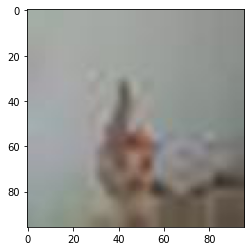

In [142]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [143]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(65, (3,3), activation='relu', input_shape=(96,96,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 94, 94, 65)        1820      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 47, 47, 65)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 45, 45, 32)        18752     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 15488)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               1548900   
_________________________________________________________________
dense_37 (Dense)             (None, 3)               

In [144]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=25)

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 66.1387 - accuracy: 0.3733
Epoch 2/25
10/10 [==============================] - 0s 12ms/step - loss: 1.0353 - accuracy: 0.7267
Epoch 3/25
10/10 [==============================] - 0s 10ms/step - loss: 1.0933 - accuracy: 0.4133
Epoch 4/25
10/10 [==============================] - 0s 10ms/step - loss: 1.0972 - accuracy: 0.3500
Epoch 5/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0977 - accuracy: 0.3433
Epoch 6/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0977 - accuracy: 0.3433
Epoch 7/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0976 - accuracy: 0.3467
Epoch 8/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0970 - accuracy: 0.3500
Epoch 9/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0967 - accuracy: 0.3500
Epoch 10/25
10/10 [==============================] - 0s 9ms/step - loss: 1.0959 - accuracy: 0.3500
Epoch 11/25
10

In [145]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
	target_size=(96,96)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)


import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=96
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_reshaped = (x_test-10)/206.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_reshaped.shape))
print("y_train shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 96, 96, 3)
y_train shape: (300,)


In [146]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0951 - accuracy: 0.3333
test_loss: 1.0950698852539062 
test_accuracy: 0.3333333432674408


이미지 출력 시 육안으로는 이전에 출력된 이미지에 비해 선명하다 느껴졌으나 모델에게는 더 혼란을 가져온 듯하다.
(모델의 입장에선 해상도가 개선된 것이 아닌 크기만 커진 격이라 구분을 더 못하는 것 같다. 그리고 학습 데이터로 학습 시 accuracy가 1이 나오는 것으로 보아 그렇게 좋은 방식은 아닌 것으로 판단됨.)
만약 해상도 부분이 같이 개선된다면 좋은 결과를 볼 수 있지 않을까 생각한다. 

### 2) 사이킷런의 RandomizedSearchCV클래스를 사용한 하이퍼파라미터 튜닝

In [19]:
# (1) 필요한 모듈 import하기
from PIL import Image 
import glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


# (2) 데이터 준비 + Resize하기
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

# 가위바위보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_1"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_1"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_1"
resize_images(image_dir_path)

300  images to be resized.
300  images to be resized.
300  images to be resized.


In [20]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 900 입니다.


In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(65, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(40, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 65)        1820      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 65)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 40)        23440     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [26]:
from scipy.stats import uniform, randint

params = {'filter' : randint(0, 1000),
         'units' : randint(0, 1000)
         }

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(model, params, n_iter = 500, n_jobs = -1)

print(gs.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

만들어진 모델에 적합한 하이퍼파라미터를 찾아 적용해보고 싶었으나 에러가 발생했다. 발생한 원인을 찾아보아도 알 수가 없었다. 이후 딥러닝에 대해 더 공부를 한 뒤에 다시 적용해 보아야 겠다. 

#### 5. 자기다짐
accuracy를 높이기 위해 여러 가지 방법을 시도해 보았으나, 만족할만한 결과물이 나오지는 못했다. 다른 방법들(대량의 학습데이터 사용, 이미지의 해상도 높이기, 정확도와 epoch와의 관계성 그래프로 나타내보기, 가중치 규제, 드롭아웃 추가, 크로스엔트로피 손실함수 등)도 적용해보고 싶었으나 아직 그만한 실력이 되지 못한다는 것만 확인한 듯하다. 현 시점에서는 위에서 정리한 모호한 점들과 내가 알게된 점을 벨로그에 정리해 확실히 가져가야 할 것이다. 그리고 적용해보지 못한 다른 방법들에 대해서는 6개월간 아이펠에서 차근차근 단계를 밟아가며 다시 시도해보고자 한다. 끝!! :) 